# Ch01

## What is machine learning
There are seveal different definitions of ML.
For me, my favouriate definition comes from Tom Mitchell, 1997 in a engineering-oriented way:
A computer program is said to learn from experience E with respect to some task T and some performance 
measure P, if its performance on T, as measured by P, improves with experice E.

## Why use machine learning

Machine learning is great for:

comlex problem/fluctuating environments/large data/no good solution using traditionl method


## Types of Machine Learning Systems

We can classify them in borad categories based on:

- whether or not they are trained with human supervison (supervise, unsupervised, semisupervised, reinforcement)

  - **Supervised learning**: traning data includins the desired solutions, called labels. 邮件的垃圾邮件分类是一个非常好的supervised learning的例子。在训练集中，每一个sample（邮件）都被标记为spam或者ham，这就是labels，而这个过程的最终结果就是让邮箱系统能够自己将邮件进行分类。
另一个典型的任务是去预测一个目标数值，即regression问题。例如预测一辆车的价格：给定一些列的汽车features（mileage，age，brand等等），这些特征被称作 predictors。为了实现训练目标，我们需要一个包含许多案例的数据集，其中不仅包含了这些predictors，还有相对应的labels（这里，就是价格）。

  注意 attribute 和 feature 的区别：尽管很多人经常相互替换地使用这两个词。但是严格地说，在机器学习中，attribute 是一种data type，例如   Mileage。然而 feature 则可以根据不同上下文关系有不同的含义，但通常意义上来说，feature 是 attribute 加上它的 value，例如 Mileage = 15000.

  注意 feature 和 preditors 的区别：在我看来，predictors 一定属于feature，但是feature不一定就是predictor。只有当你把这个feature用来作为训练时，这个feature才叫做predictor

  - **Unsupervised learning**: 没有labels的机器学习。

  - **Semisupervised learning**： partially labeled traning data

  - **Reinforcement learning**： it is a very different beast (野兽）. The learning system, called an *agent* in this  context,
  can observe the environment, slect, and perform actions, and get *rewards* (or the nagative rewards, *penalties*). It   must then learn by itself what is the best strategy, called a *policy*, to get the most reward over time. A policy defines what action the agent should choose when it is in a given situation.


- whether or not they can incrementally on the fly (online versus batch learning)
  
  - batch learning: **incapable of** learning incrementally; *offline learning*
  
  - online learning: learning incarementally; Note tahat the who process is usually done offline (i.e., not on the live system), so online learning can be a confusing name. Think of it as *incremental learning*.

- whether they work by simply comparing new data points to known data points, or instead detect patterns in the traning data and build a predictive model, much like scientists do (instance-based versus model-based learning).

## Example 1-1

### Model-based learning

**Make some preparations for the environment**

In [42]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)  # I don't understand this line very much!

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "fundamentals"

# prepare a function to save figures
def save_fig(fig_id, tight_layout=True, dpi=300):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=dpi)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

**Author's Note**

Author's note: This function just merges the OECD's life satisfaction data and the IMF's GDP per capita data. It's a bit too long and boring and it's not specific to Machine Learning, which is why I left it out of the book.

**Prepare a function which merges the data into DataFrame**

In [46]:

# Define a function
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

I just tweaked the data files here to fetch the files in datasets/lifesat.

**Plot the data pints with scatters**

4.853052800266436 4.911544589158484e-05


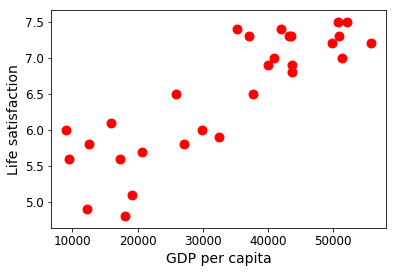

In [72]:
# Code example
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model
import os

# Load the data   thousands : str, default None, 千分位分割符，如“，”或者“."

datapath = os.path.join("datasets", "lifesat", "")
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv",thousands=',',
                             delimiter='\t',
                             encoding='latin1', na_values="n/a")

# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
# print(type(country_stats))  # country_stats is a DataFrame.
# print(country_stats.head(10))
xdata = np.c_[country_stats["GDP per capita"]]
# print(xdata[:10])  # xdata and ydata are python lists.
ydata = np.c_[country_stats["Life satisfaction"]]
# print(ydata[:10])

# Visualize the data by scatter
country_stats.plot(kind='scatter', s=80, color='red',
                   x="GDP per capita", y = "Life satisfaction")

# Select a linear model
model = sklearn.linear_model.LinearRegression()

# Train the model
model.fit(xdata, ydata)
# Get the optimized paraters for the model
k, b = model.intercept_[0], model.coef_[0][0]
print(k, b)

**Plot the best fit**

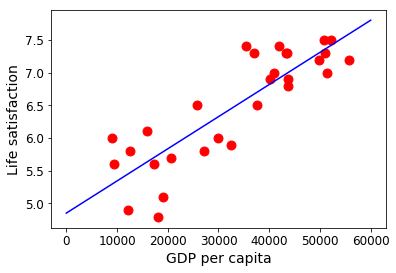

In [74]:
country_stats.plot(kind='scatter', s=80, color='red',
                   x="GDP per capita", y = "Life satisfaction")

# plot the best fit, k, b can be found in the output of previous cell
k = 4.853052800266436
b = 4.911544589158484E-5
x_tmp = np.linspace(0, 60000, 1000)
plt.plot(x_tmp, k + b*x_tmp, "blue")
# print(x_tmp)

**Predict Life satisfaction for a new instance**

In [66]:
# Make a prediction for Cyprus
x_new = [[22587]]  # Cyprus's GDP per capita
print("Life satisfaction of Cyprus is", model.predict(x_new))

Life satisfaction of Cyprus is [[5.96242338]]


In [ ]:
Life satisfaction

### Apply instance-based learning into the Example1-1

In the following cell, I use $K$-Nearest Neighbours regression model to train the data. It's a widely used instance-based learning algorithm.
In this example, I will use $K$ = 3.

In [88]:
# Select a linear model
# from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsRegressor
clf = KNeighborsRegressor(n_neighbors=3)

# Train the model
clf.fit(xdata, ydata)

# Make a prediction for Cyprus
x_new = [[22587]]  # Cyprus's GDP per capita
print(clf.predict(x_new))


[[5.76666667]]


If it (instance-based learning) goes well, our model will make good predictions, however, if it doesn't work well, we need to use more attributes like employment rate, healty, air poluttion, etc, in other words, we need get more data in good quality, or perhaps select a more powerful model like Polynominal Regression model.

**In Summary, a machine learning project usually look like**

1. We stuided the data

2. We slected a model

3. We trained it on the training data (i.e. the learning algorithm searched for the model parameter values that minimize a cost function).

4. Finnaly, we applied the model to make predictions on new cases (this is called $inference$), hoping that this model will generalize well.




## The challenges of Machine Learning

The things may make your machine learning project into a mess is 'bad algorithm' and 'bad data'.

We usually need achive a tradeoff between the data development and spending money and time on algorithm development.

## Data part

#### Insufficient quality of training data

#### Nonrepresentative training data

Check whether your dataset has sampling bias/sampling noise or not. 

#### Poor-quality data

It's often well worth the effort to spend time cleaning up the training data. The truth is most data scientists spend a significant part of their time doing just that. For example:

- If some instances are clearly outliers, it may help to simply discard them or try to fix the errors manually

- If some instances are missing a few features (e.g., 50% of the customers did not specify their age), you msut decide whether you want to ignore this attibute altogether, ignore these instanxes, fill in the missing values (e.g., wthe the median age), or train one model with the feature and one model without it, and so on)

#### Irrelevant Features

including too many irrelevant features will influce machine learning results. Hence, **feature engineering** is quite important, and it usually involves

- Feature selection: choose the most useful features to train on aming existing features

- Feature extraction: combining exsisting featuers to produce a more useful one (dimensionality reduction algorithms can help)

- Creating new features by gathering new data


### Algorithm part

#### Overfitting the traning data

Overfitting: model performs well on the training data, but does not generalize well. This usually happens when the model is highly complex with respect to the amount and noisiness of the training data.

To solve this problem, we have some solutions that we can try:

- To simplify the model 

- To get more good data

- To reduce the noise in the exsiting training data (fix or remove some bad data)

Constraining a model to make it simpler and reduce the risk of overfitting: *regularization*.


**To simplify a model**, we can use other models instead of it, or we can simplify it by constraining it. The latter (constraining model) is called **regularization**

The amount of regularization to apply during learning can be controlled by a **hyperparameter** which is set before training and will not be influed by the learning algorithm.

#### Underfitting the traning data

Underfitting is the opposite of overfitting: it occurs when your model is too simple to learn the underlying structure of the data.

The iptions to fix underfitting:

- select a more powerful model

- feeding beter features

- reducing the constraints on the model (e.g. reducng the regularization hyperparameter)

#### Stepping back

Let us step back and look at the big picture:

In a ML project, we feed the training set to a learning algorithm. If the algorithm is **model-based** it tunes some parameters to fit the model to the training set, and we will hope it be able to make good predictions on new cases as well. If the algorithm is **instance-based**, it just learns the examples by heart and uses **a similarity measure** to generalize to new instances.

#### Testing and validating

We train the model using the training set and test the model using test set. The error rate on new cases is called the 'generalization error' or 'out-of-sample error', and by evaluating our model on the test set, we can estimate the error. This value indicate how well our model will perform on new instances.

In general, 80% of the data for training, and hold out 20% for testing.

However, sometimes we may find that even the generalization error in the test set is quite low, it still performs bad in the new instances out of the dataset, the solution is to have a second holdout set called the **'validation set'**. 

To avoid 'wasting' too much training data in validation sets, a common technique is to use **cross-validation**: the training set is split into complementary subsets, and each model is trained against a different combination of these subsets and validated against the ramaining parts. Once the model type and hyperparameters have been selected, a final model is trained using these hyperparameters on the full training set, and the generalized error is measured on the test set.

-------------**No Free Lunch Theorem**-------------------

A model is a simplied version of the observations. In the famous paper 'The lack of a priori distinctions between learning algorithms' by **D. Wolperts** in 1996, it demonsted that if you make absolutedly no assumption about the data, then there is no reason to prefer one model over any other. This is called the 'No Free Lunch Theorem'.

In [89]:
10**9.5

3162277660.1683793

## Example code of using Regularization to reduce the risk of overfitting

[2, 3, 4, 5, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]
<class 'pandas.core.frame.DataFrame'>


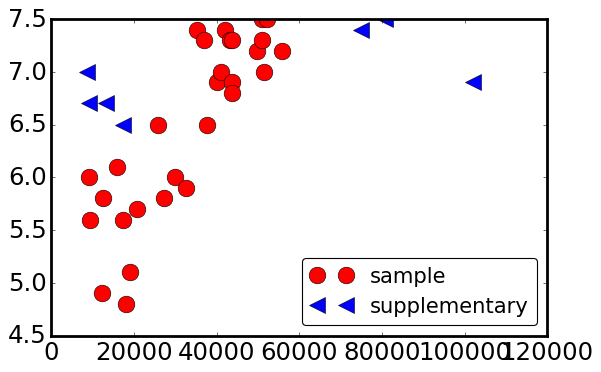

In [141]:
%matplotlib inline
import matplotlib.style
import matplotlib as mpl
mpl.style.use('classic')
mpl.rcParams['figure.facecolor'] = '1'
#if choose the grey backgroud, use 0.75
mpl.rcParams['figure.figsize'] = [8,8/1.618]
mpl.rcParams['lines.linewidth'] = 2.2
mpl.rcParams['legend.fancybox'] = True
mpl.rcParams['legend.fontsize'] = 19
mpl.rcParams['legend.scatterpoints'] = 1 #scatterpoints,
mpl.rcParams["axes.formatter.useoffset"]=False #turn off the axis offset-values. 
# If on. the axis label will use a offset value by the side of axis
mpl.rcParams["axes.linewidth"]  = 2.5 #change the boarder width
#plt.rcParams["axes.edgecolor"] = "0.15" #change the boarder color
ticklabel_size = 22
mpl.rcParams['xtick.labelsize'] = ticklabel_size
mpl.rcParams['ytick.labelsize'] = ticklabel_size

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import DataFrame



########################Load data########################
# Define a function used for merging data
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    return full_country_stats[["GDP per capita", 'Life satisfaction']]
#     remove_indices = [0, 1, 6, 8, 33, 34, 35]
#     keep_indices = list(set(range(36)) - set(remove_indices))
# return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

remove_indices = [0, 1, 6, 8, 33, 34, 35]
keep_indices = list(set(range(36)) - set(remove_indices))

datapath = os.path.join("datasets", "lifesat", "")
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv",thousands=',',
                             delimiter='\t',
                             encoding='latin1', na_values="n/a")

# Prepare the data
print(keep_indices)
full_data = prepare_country_stats(oecd_bli, gdp_per_capita)

# devide the data into two part. I will compare the different learning by using partial data and all data
sample_data = full_data.iloc[keep_indices]
supplementary_data = full_data.iloc[remove_indices]
print(type(sample_data))


#################training#########################
## use sample_data for training, use LinearRegression algorithm

## use full_data for training, use LinearRegression algorithm

## use sample_data for training, use Regularization to reduce the overfitting

#################Ploting part#####################
fig1 = plt.figure()
ax1=fig1.add_subplot(1,1,1)

# plot all the data using scatters
ax1.plot(sample_data['GDP per capita'], sample_data['Life satisfaction'], 'o',color='red',markersize=15, label='sample')
ax1.plot(supplementary_data['GDP per capita'], supplementary_data['Life satisfaction'], '<', color='blue',
        markersize=15, label='supplementary')
ax1.legend(loc='best')


9437.372

In [106]:
sample_data.head(10)

,GDP per capita,Life satisfaction
Country,,
Brazil,8669.998,7.0
Mexico,9009.280,6.7
Chile,13340.905,6.7
Czech Republic,17256.918,6.5
Norway,74822.106,7.4
Switzerland,80675.308,7.5
Luxembourg,101994.093,6.9


In [108]:
supplementary_data

,GDP per capita,Life satisfaction
Country,,
Brazil,8669.998,7.0
Mexico,9009.280,6.7
Chile,13340.905,6.7
Czech Republic,17256.918,6.5
Norway,74822.106,7.4
Switzerland,80675.308,7.5
Luxembourg,101994.093,6.9
